In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
source_tweets = pd.read_csv('source_tweets.csv')

In [3]:
# Separate rumors and non-rumors
rumors = source_tweets[source_tweets['rumor_type'] == 'rumours']
non_rumors = source_tweets[source_tweets['rumor_type'] == 'non-rumours']

# Calculate average followers count for rumors vs. non-rumors
avg_followers_rumors = rumors['user_followers_count'].mean()
avg_followers_non_rumors = non_rumors['user_followers_count'].mean()

# Calculate the proportion of verified users in rumors vs. non-rumors
verified_rumors = rumors['user_verified'].mean() * 100  # In percentage
verified_non_rumors = non_rumors['user_verified'].mean() * 100  # In percentage

In [4]:
print("Average Followers Count:")
print(f"Rumors: {avg_followers_rumors}")
print(f"Non-rumors: {avg_followers_non_rumors}")

print("\nPercentage of Verified Users:")
print(f"Rumors: {verified_rumors}%")
print(f"Non-rumors: {verified_non_rumors}%")

Average Followers Count:
Rumors: 1863546.4381338742
Non-rumors: 970060.5339425588

Percentage of Verified Users:
Rumors: 66.37931034482759%
Non-rumors: 50.07832898172324%


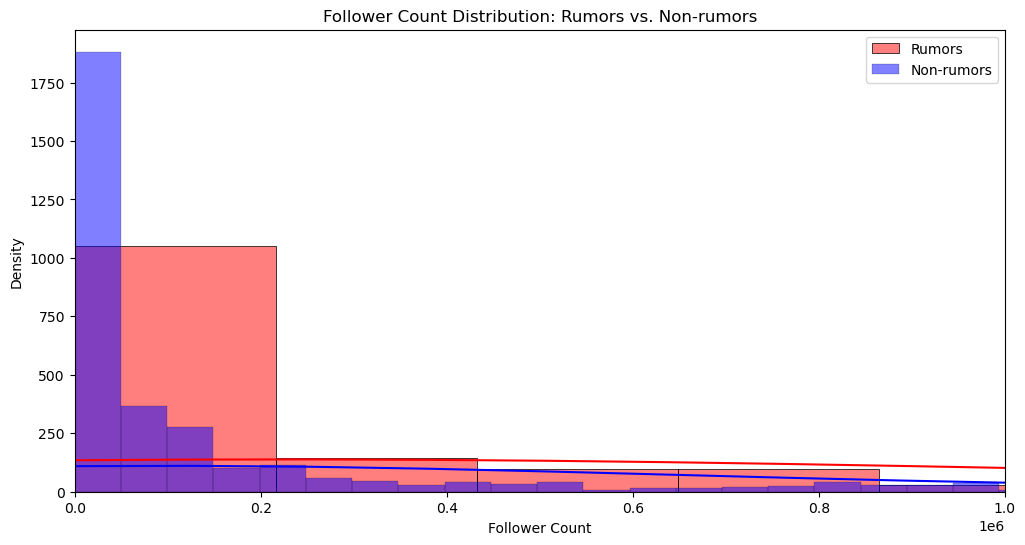

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(rumors['user_followers_count'], color='red', label='Rumors', kde=True)
sns.histplot(non_rumors['user_followers_count'], color='blue', label='Non-rumors', kde=True)
plt.xlabel('Follower Count')
plt.ylabel('Density')
plt.title('Follower Count Distribution: Rumors vs. Non-rumors')
plt.xlim(0, 1000000)
plt.legend()
plt.show()

C:\Users\Aman\AppData\Local\Temp\ipykernel_11824\548871542.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Rumors', 'Non-rumors'], y=[verified_rumors, verified_non_rumors], palette='viridis')


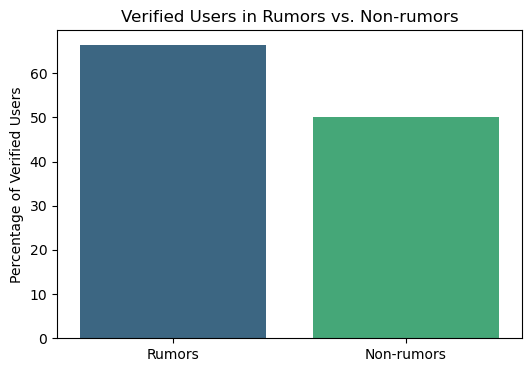

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x=['Rumors', 'Non-rumors'], y=[verified_rumors, verified_non_rumors], palette='viridis')
plt.ylabel('Percentage of Verified Users')
plt.title('Verified Users in Rumors vs. Non-rumors')
plt.show()

In [26]:
avg_retweets_rumors = rumors['retweet_count'].mean()
avg_retweets_non_rumors = non_rumors['retweet_count'].mean()
avg_favorites_rumors = rumors['favorite_count'].mean()
avg_favorites_non_rumors = non_rumors['favorite_count'].mean()

print("Average Engagement (Retweets and Favorites):")
print(f"Rumors - Retweets: {avg_retweets_rumors}, Favorites: {avg_favorites_rumors}")
print(f"Non-rumors - Retweets: {avg_retweets_non_rumors}, Favorites: {avg_favorites_non_rumors}")

Average Engagement (Retweets and Favorites):
Rumors - Retweets: 319.7352941176471, Favorites: 130.63083164300204
Non-rumors - Retweets: 436.5099216710183, Favorites: 270.81644908616187


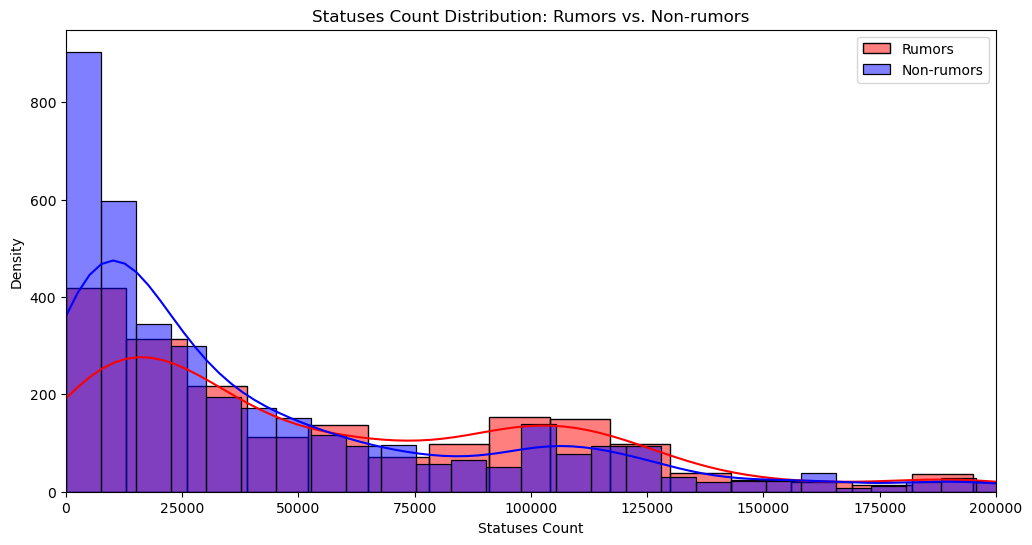

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(rumors['user_statuses_count'], color='red', label='Rumors', kde=True)
sns.histplot(non_rumors['user_statuses_count'], color='blue', label='Non-rumors', kde=True)
plt.xlabel('Statuses Count')
plt.ylabel('Density')
plt.title('Statuses Count Distribution: Rumors vs. Non-rumors')
plt.legend()
plt.xlim(0, 200000)
plt.show()

In [55]:
!pip install WordCloud

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   ------------------- -------------------- 143.4/301.4 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 3.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


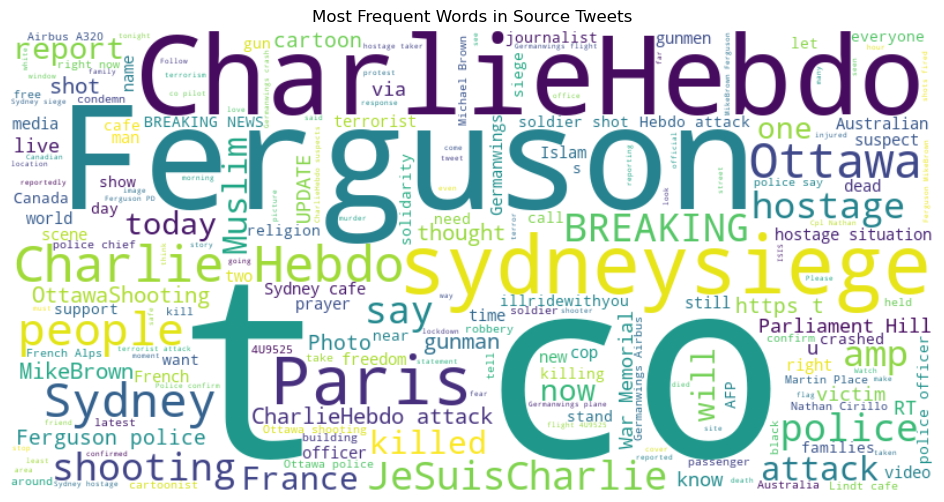

In [56]:
from wordcloud import WordCloud

all_text = ' '.join(source_tweets['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Source Tweets')
plt.show()